In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the datasets
train_file_path = "OccupancyTrain.csv"
test_file_path = "OccupancyTest.csv"

# Read the data
data_train = pd.read_csv(train_file_path,header=None)
data_test = pd.read_csv(test_file_path, header=None)


In [2]:
# Renaming columns based on given descriptions
column_names = ["temperature", "relative_humidity", "light", "CO2", "humidity_ratio", "occupancy"]
data_train.columns = column_names
data_test.columns = column_names

# Display first few rows to understand the structure
data_train.head(),data_test.head()

(   temperature  relative_humidity   light      CO2  humidity_ratio  occupancy
 0        21.29               21.1    0.00   592.50        0.003297        0.0
 1        22.10               26.6  464.00  1073.25        0.004375        1.0
 2        19.39               27.2    0.00   463.00        0.003783        0.0
 3        20.60               19.5    0.00   435.00        0.002919        0.0
 4        21.50               33.5  475.25  1281.50        0.005320        1.0,
    temperature  relative_humidity   light          CO2  humidity_ratio  \
 0        23.10          29.700000  466.50  1224.666667        0.005198   
 1        19.79          36.200000   24.00   507.500000        0.005172   
 2        20.39          32.290000    0.00   684.000000        0.004785   
 3        21.50          32.090000  440.25   619.000000        0.005094   
 4        21.29          26.683333  454.00   895.166667        0.004176   
 
    occupancy  
 0        1.0  
 1        0.0  
 2        0.0  
 3       

Exercise 1 (Visualization) (1) Visualize the density distribu-
tion of the target variable (occupancy status) in the training dataset

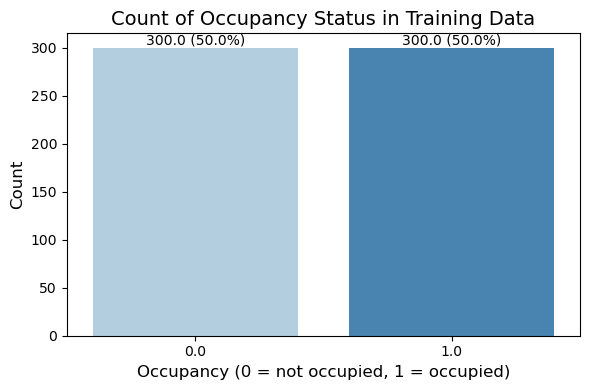

In [3]:
# Read the training data
dataTrain = pd.read_csv('OccupancyTrain.csv', header=None)

# The target variable (occupancy) is in the last column
YTrain = dataTrain.iloc[:, -1]

# Set up the plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=YTrain, hue=YTrain, palette="Blues", dodge=False, legend=False)

# Calculate total number of samples
total = len(YTrain)

# Annotate each bar with exact counts and percentage
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(f'{count} ({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom', fontsize=10)

# Labeling and title
plt.title("Count of Occupancy Status in Training Data", fontsize=14)
plt.xlabel("Occupancy (0 = not occupied, 1 = occupied)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()


Exercise 1 (Visualization) (2) a correlation matrix plot

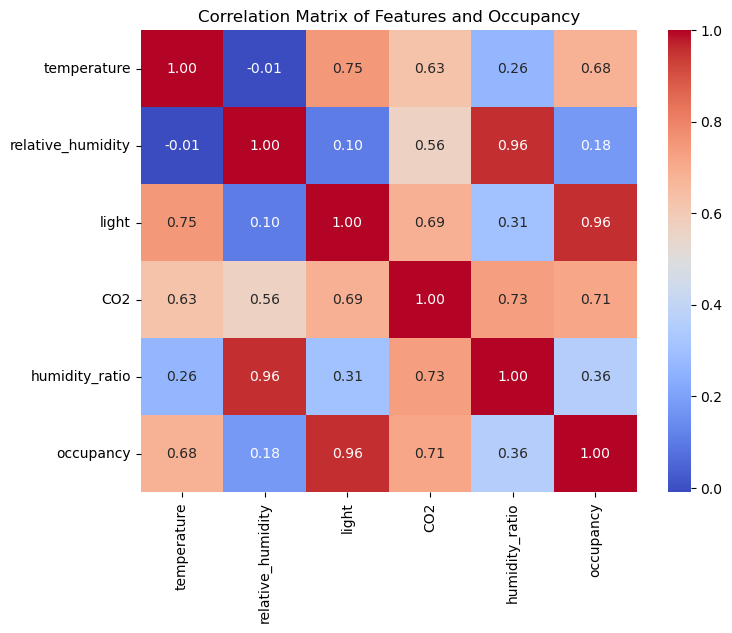

In [4]:
# We can create a DataFrame with columns including all features + occupancy
column_names = ['temperature', 'relative_humidity', 'light', 'CO2', 'humidity_ratio', 'occupancy']
dfTrain = pd.read_csv('OccupancyTrain.csv', header=None, names=column_names)

# Compute correlation matrix
corr_matrix = dfTrain.corr()  # default method is Pearson’s correlation

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features and Occupancy')
plt.show()


Exercise 2 (Hypothesis testing) use scipy's stats.t.cdf.

In [5]:
from scipy.stats import t

# Read the CSV data
dataTrain = pd.read_csv("OccupancyTrain.csv", header=None)
dataTrain.columns = ["temperature", "relative_humidity", "light", "CO2", "humidity_ratio", "occupancy"]

# Separate by occupancy status
occupied_data = dataTrain[dataTrain["occupancy"] == 1]
not_occupied_data = dataTrain[dataTrain["occupancy"] == 0]

# Choose features to test
features = ["temperature", "relative_humidity", "light", "CO2", "humidity_ratio"]

def welch_ttest(x1, x2, alpha=0.05):
    """
    Perform a two-sided Welch's t-test (unequal variances) between two arrays x1, x2.
    Returns (t_statistic, degrees_of_freedom, p_value, reject_bool).
    """
    n1 = len(x1)
    n2 = len(x2)
    mean1 = np.mean(x1)
    mean2 = np.mean(x2)
    var1 = np.var(x1, ddof=1)  # sample variance with Bessel’s correction
    var2 = np.var(x2, ddof=1)

    # 1. Compute Welch’s t-statistic
    t_stat = (mean1 - mean2) / np.sqrt(var1/n1 + var2/n2)

    # 2. Approximate degrees of freedom
    numerator = (var1/n1 + var2/n2)**2
    denominator = ((var1/n1)**2 / (n1 - 1)) + ((var2/n2)**2 / (n2 - 1))
    df = numerator / denominator

    # 3. Two-sided p-value using the t-distribution CDF
    #    P(T > |t_stat|) = 1 - cdf(|t_stat|, df)
    #    p_value = 2 * P(T > |t_stat|)
    p_value = 2 * (1 - t.cdf(abs(t_stat), df))

    # 4. Determine rejection
    reject = (p_value < alpha)
    return t_stat, df, p_value, reject

alpha = 0.05
results = []

for feat in features:
    x_occ = occupied_data[feat].values
    x_not = not_occupied_data[feat].values

    t_stat, df, p_val, reject_null = welch_ttest(x_occ, x_not, alpha=alpha)
    # results.append((feat, t_stat, df, p_val, reject_null))
    results.append({
        'feature': feat,
        't_stat': t_stat,
        'df': df,
        'p_val': p_val,
        'reject_H0': reject_null
    })

# Print out in a neat table
# print("Feature | t-stat      | df (approx)  | p-value       | Reject H0?")
# for feat, t_val, dof, p, reject in results:
#     print(f"{feat:16s} | {t_val:.4f} | {dof:.4f} | {p:.6g} | {reject}")
for res in results:
    print(f"Feature          : {res['feature']}")
    print(f"  t-statistic    : {res['t_stat']:.4f}")
    print(f"  degrees of fr. : {res['df']:.4f}")
    print(f"  p-value        : {res['p_val']:.6g}")
    print(f"  Reject H0      : {res['reject_H0']}")
    print("-"*40)

Feature          : temperature
  t-statistic    : 22.9000
  degrees of fr. : 537.4081
  p-value        : 0
  Reject H0      : True
----------------------------------------
Feature          : relative_humidity
  t-statistic    : 4.3896
  degrees of fr. : 592.4239
  p-value        : 1.34473e-05
  Reject H0      : True
----------------------------------------
Feature          : light
  t-statistic    : 81.1792
  degrees of fr. : 441.5188
  p-value        : 0
  Reject H0      : True
----------------------------------------
Feature          : CO2
  t-statistic    : 24.9309
  degrees of fr. : 355.0153
  p-value        : 0
  Reject H0      : True
----------------------------------------
Feature          : humidity_ratio
  t-statistic    : 9.4386
  degrees of fr. : 560.2636
  p-value        : 0
  Reject H0      : True
----------------------------------------


Exercise 2 (Hypothesis testing)  use scipy's stats.ttest ind.

In [6]:
from scipy.stats import ttest_ind

def welch_df(x1, x2):

    n1 = len(x1)
    n2 = len(x2)
    s1_sq = np.var(x1, ddof=1)
    s2_sq = np.var(x2, ddof=1)

    numerator = (s1_sq / n1 + s2_sq / n2) ** 2

    denominator = ((s1_sq / n1) ** 2) / (n1 - 1) + ((s2_sq / n2) ** 2) / (n2 - 1)

    return numerator / denominator

df = pd.read_csv('OccupancyTrain.csv', header=None)
df.columns = ['temperature', 'relative_humidity', 'light', 'CO2', 'humidity_ratio', 'occupancy']

df_occupied = df[df['occupancy'] == 1]
df_not_occupied = df[df['occupancy'] == 0]

features = ['temperature', 'relative_humidity', 'light', 'CO2', 'humidity_ratio']
alpha = 0.05

results = []
for feat in features:
    x1 = df_occupied[feat].values
    x2 = df_not_occupied[feat].values

    t_stat, p_val = ttest_ind(x1, x2, equal_var=False)

    df_welch = welch_df(x1, x2)

    reject = (p_val < alpha)

    results.append({
        'feature': feat,
        't_stat': t_stat,
        'df': df_welch,
        'p_val': p_val,
        'reject_H0': reject
    })

for res in results:
    print(f"Feature          : {res['feature']}")
    print(f"  t-statistic    : {res['t_stat']:.4f}")
    print(f"  degrees of fr. : {res['df']:.4f}")
    print(f"  p-value        : {res['p_val']:.6g}")
    print(f"  Reject H0      : {res['reject_H0']}")
    print("-"*40)


Feature          : temperature
  t-statistic    : 22.9000
  degrees of fr. : 537.4081
  p-value        : 1.66321e-81
  Reject H0      : True
----------------------------------------
Feature          : relative_humidity
  t-statistic    : 4.3896
  degrees of fr. : 592.4239
  p-value        : 1.34473e-05
  Reject H0      : True
----------------------------------------
Feature          : light
  t-statistic    : 81.1792
  degrees of fr. : 441.5188
  p-value        : 1.64988e-267
  Reject H0      : True
----------------------------------------
Feature          : CO2
  t-statistic    : 24.9309
  degrees of fr. : 355.0153
  p-value        : 5.216e-80
  Reject H0      : True
----------------------------------------
Feature          : humidity_ratio
  t-statistic    : 9.4386
  degrees of fr. : 560.2636
  p-value        : 1.00317e-19
  Reject H0      : True
----------------------------------------


Exercise 3 (1-NearestNeighbor)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Read in data
train_data = pd.read_csv('OccupancyTrain.csv', header=None)
test_data  = pd.read_csv('OccupancyTest.csv', header=None)

# 2. Split features (X) and target (y)
XTrain = train_data.iloc[:, :-1].values  # all rows, all but last column
YTrain = train_data.iloc[:, -1].values   # all rows, last column
XTest  = test_data.iloc[:, :-1].values
YTest  = test_data.iloc[:, -1].values

# 3. Create and train a 1-NN model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(XTrain, YTrain)

# 4. Predict and compute accuracy
accTrain = accuracy_score(YTrain, knn.predict(XTrain))
accTest  = accuracy_score(YTest, knn.predict(XTest))

print("1-NN Training Accuracy:", accTrain)
print("1-NN Test Accuracy    :", accTest)

1-NN Training Accuracy: 1.0
1-NN Test Accuracy    : 0.9775


Exercise 4 (Cross-validation)

Cross-validation accuracies: [0.9800000000000001, 0.9916666666666666, 0.9916666666666666, 0.9916666666666666, 0.9916666666666666, 0.99]
Best k (k_best) = 3 with average accuracy = 0.9917


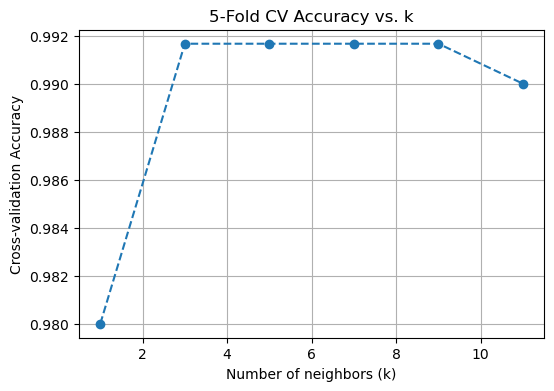

In [8]:
from sklearn.model_selection import KFold

# 1. Read the training data
dataTrain = pd.read_csv('OccupancyTrain.csv', header=None)
XTrain = dataTrain.iloc[:, :-1].values
YTrain = dataTrain.iloc[:, -1].values

# List of k values to try
k_values = [1, 3, 5, 7, 9, 11]

# 2. Set up 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

mean_accuracies = []

# 3. For each k in our candidate list:
for k in k_values:
    # Store the accuracy from each fold
    fold_accuracies = []

    # 4. Perform cross-validation
    for train_index, val_index in cv.split(XTrain):
        # Split into train/val folds
        XTrainCV, XValCV = XTrain[train_index], XTrain[val_index]
        YTrainCV, YValCV = YTrain[train_index], YTrain[val_index]

        # Build a k-NN model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(XTrainCV, YTrainCV)

        # Evaluate on the validation fold
        YPredCV = knn.predict(XValCV)
        acc = accuracy_score(YValCV, YPredCV)
        fold_accuracies.append(acc)

    # Compute the mean accuracy across all folds for this k
    mean_acc = np.mean(fold_accuracies)
    mean_accuracies.append(mean_acc)

# 5. Identify the best k
best_idx = np.argmax(mean_accuracies)
k_best = k_values[best_idx]
best_acc = mean_accuracies[best_idx]

print("Cross-validation accuracies:", mean_accuracies)
print(f"Best k (k_best) = {k_best} with average accuracy = {best_acc:.4f}")

# 6. Plot accuracy vs. k
plt.figure(figsize=(6,4))
plt.plot(k_values, mean_accuracies, marker='o', linestyle='--')
plt.title("5-Fold CV Accuracy vs. k")
plt.xlabel("Number of neighbors (k)")
plt.ylabel("Cross-validation Accuracy")
plt.grid(True)
plt.show()


Exercise 5 (k_{best} model).

In [9]:
# k_best = 3 (from Exercise 4)
k_best = 3

# 1. Read training and test data
train_data = pd.read_csv('OccupancyTrain.csv', header=None)
test_data = pd.read_csv('OccupancyTest.csv', header=None)

# 2. Split into features (X) and labels (y)
XTrain = train_data.iloc[:, :-1].values
YTrain = train_data.iloc[:, -1].values
XTest  = test_data.iloc[:, :-1].values
YTest  = test_data.iloc[:, -1].values

# 3. Build the k_best-NN classifier using the entire training data
knn_best = KNeighborsClassifier(n_neighbors=k_best)
knn_best.fit(XTrain, YTrain)

# 4. Evaluate on the training set
accTrain = accuracy_score(YTrain, knn_best.predict(XTrain))

# 5. Evaluate on the test set
accTest = accuracy_score(YTest, knn_best.predict(XTest))

# Print results
print(f"Training Accuracy with k={k_best}: {accTrain:.4f}")
print(f"Test Accuracy with k={k_best}:     {accTest:.4f}")


Training Accuracy with k=3: 0.9933
Test Accuracy with k=3:     0.9875


Exercise 6 (Data normalization) # version 1

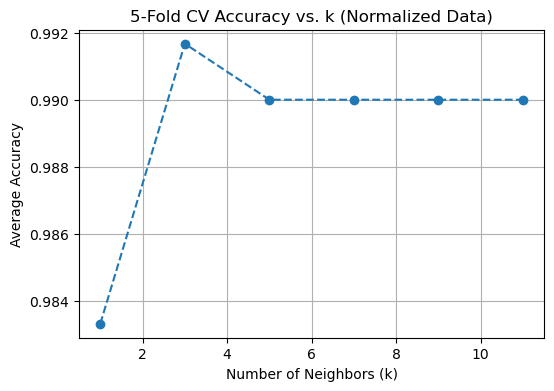

Cross-validation accuracies: [0.9833333333333332, 0.9916666666666666, 0.99, 0.99, 0.99, 0.99]
Best k (k_best) = 3 with average accuracy = 0.9917
Training Accuracy with k=3: 0.9933
Test Accuracy with k=3:     0.9875


In [10]:
from sklearn import preprocessing

# --- Normalization using Version 1 (Correct Approach) ---
scaler = preprocessing.StandardScaler().fit(XTrain)
XTrainN = scaler.transform(XTrain)
XTestN = scaler.transform(XTest)

# --- Cross-validation to Select k_best ---
k_values = [1, 3, 5, 7, 9, 11]
cv = KFold(n_splits=5, shuffle=True, random_state=42)
mean_accuracies = []

for k in k_values:
    fold_accuracies = []
    for train_idx, val_idx in cv.split(XTrainN):
        XTrainCV, XValCV = XTrainN[train_idx], XTrainN[val_idx]
        YTrainCV, YValCV = YTrain[train_idx], YTrain[val_idx]

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(XTrainCV, YTrainCV)
        fold_accuracies.append(accuracy_score(YValCV, knn.predict(XValCV)))

    mean_accuracies.append(np.mean(fold_accuracies))

best_idx = np.argmax(mean_accuracies)
k_best = k_values[best_idx]

# Plotting CV accuracy vs. k
plt.figure(figsize=(6,4))
plt.plot(k_values, mean_accuracies, marker='o', linestyle='--')
plt.title("5-Fold CV Accuracy vs. k (Normalized Data)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Average Accuracy")
plt.grid(True)
plt.show()

print("Cross-validation accuracies:", mean_accuracies)
print(f"Best k (k_best) = {k_best} with average accuracy = {mean_accuracies[best_idx]:.4f}")

# --- Final Evaluation with k_best ---
knn_best = KNeighborsClassifier(n_neighbors=k_best)
knn_best.fit(XTrainN, YTrain)

accTrain = accuracy_score(YTrain, knn_best.predict(XTrainN))
accTest  = accuracy_score(YTest, knn_best.predict(XTestN))

print(f"Training Accuracy with k={k_best}: {accTrain:.4f}")
print(f"Test Accuracy with k={k_best}:     {accTest:.4f}")


Exercise 6 (Data normalization) # version 2

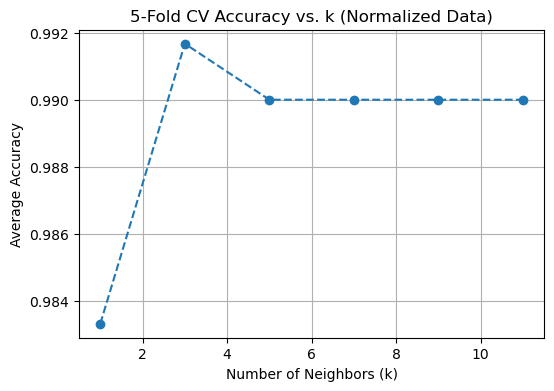

Cross-validation accuracies: [0.9833333333333332, 0.9916666666666666, 0.99, 0.99, 0.99, 0.99]
Best k (k_best) = 3 with average accuracy = 0.9917
Training Accuracy with k=3: 0.9933
Test Accuracy with k=3:     0.9900


In [11]:
# --- Normalization using Version 2 (Flawed – Separate Fits, False) ---
scaler = preprocessing.StandardScaler().fit(XTrain)
XTrainN = scaler.transform(XTrain)
scaler = preprocessing.StandardScaler().fit(XTest)
XTestN = scaler.transform(XTest)

# --- Cross-validation to Select k_best ---
k_values = [1, 3, 5, 7, 9, 11]
cv = KFold(n_splits=5, shuffle=True, random_state=42)
mean_accuracies = []

for k in k_values:
    fold_accuracies = []
    for train_idx, val_idx in cv.split(XTrainN):
        XTrainCV, XValCV = XTrainN[train_idx], XTrainN[val_idx]
        YTrainCV, YValCV = YTrain[train_idx], YTrain[val_idx]

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(XTrainCV, YTrainCV)
        fold_accuracies.append(accuracy_score(YValCV, knn.predict(XValCV)))

    mean_accuracies.append(np.mean(fold_accuracies))

best_idx = np.argmax(mean_accuracies)
k_best = k_values[best_idx]

# Plotting CV accuracy vs. k
plt.figure(figsize=(6,4))
plt.plot(k_values, mean_accuracies, marker='o', linestyle='--')
plt.title("5-Fold CV Accuracy vs. k (Normalized Data)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Average Accuracy")
plt.grid(True)
plt.show()

print("Cross-validation accuracies:", mean_accuracies)
print(f"Best k (k_best) = {k_best} with average accuracy = {mean_accuracies[best_idx]:.4f}")

# --- Final Evaluation with k_best ---
knn_best = KNeighborsClassifier(n_neighbors=k_best)
knn_best.fit(XTrainN, YTrain)

accTrain = accuracy_score(YTrain, knn_best.predict(XTrainN))
accTest  = accuracy_score(YTest, knn_best.predict(XTestN))

print(f"Training Accuracy with k={k_best}: {accTrain:.4f}")
print(f"Test Accuracy with k={k_best}:     {accTest:.4f}")


Exercise 6 (Data normalization) # version 3

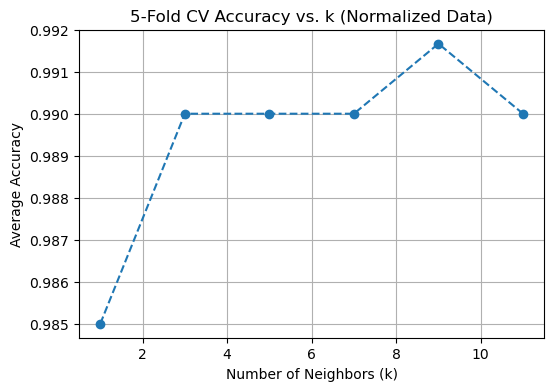

Cross-validation accuracies: [0.9850000000000001, 0.99, 0.99, 0.99, 0.9916666666666666, 0.9899999999999999]
Best k (k_best) = 9 with average accuracy = 0.9917
Training Accuracy with k=9: 0.9917
Test Accuracy with k=9:     0.9650


In [12]:
# --- Normalization using Version 3 (Combined Data Fit, False) ---
XTotal = np.concatenate((XTrain, XTest))
scaler = preprocessing.StandardScaler().fit(XTotal)
XTrainN = scaler.transform(XTrain)
XTestN = scaler.transform(XTest)

# --- Cross-validation to Select k_best ---
k_values = [1, 3, 5, 7, 9, 11]
cv = KFold(n_splits=5, shuffle=True, random_state=42)
mean_accuracies = []

for k in k_values:
    fold_accuracies = []
    for train_idx, val_idx in cv.split(XTrainN):
        XTrainCV, XValCV = XTrainN[train_idx], XTrainN[val_idx]
        YTrainCV, YValCV = YTrain[train_idx], YTrain[val_idx]

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(XTrainCV, YTrainCV)
        fold_accuracies.append(accuracy_score(YValCV, knn.predict(XValCV)))

    mean_accuracies.append(np.mean(fold_accuracies))

best_idx = np.argmax(mean_accuracies)
k_best = k_values[best_idx]

# Plotting CV accuracy vs. k
plt.figure(figsize=(6,4))
plt.plot(k_values, mean_accuracies, marker='o', linestyle='--')
plt.title("5-Fold CV Accuracy vs. k (Normalized Data)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Average Accuracy")
plt.grid(True)
plt.show()

print("Cross-validation accuracies:", mean_accuracies)
print(f"Best k (k_best) = {k_best} with average accuracy = {mean_accuracies[best_idx]:.4f}")

# --- Final Evaluation with k_best ---
knn_best = KNeighborsClassifier(n_neighbors=k_best)
knn_best.fit(XTrainN, YTrain)

accTrain = accuracy_score(YTrain, knn_best.predict(XTrainN))
accTest  = accuracy_score(YTest, knn_best.predict(XTestN))

print(f"Training Accuracy with k={k_best}: {accTrain:.4f}")
print(f"Test Accuracy with k={k_best}:     {accTest:.4f}")
